In [1]:
import pandas as pd
import networkx as nx
import urllib as url
import matplotlib.pyplot as plt
import random
import time
# pip install pandas
# pip install networkx

# for execution time can also try this in command line:
# time -v python yourprogram.py

In [2]:
start_time = time.time() # could maybe put this before the shortest graph
edge_file = open("wiki_data/links.tsv", "rb")
graph = nx.read_edgelist(edge_file)
edge_file.close()

Below we can see that the data is encoded in *some* way. I am not 100% sure if the following cells 

In [3]:
nodes = pd.read_csv('wiki_data/articles.tsv', header=0)
nodes.head()

,Article_Name
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
1,%C3%85land
2,%C3%89douard_Manet
3,%C3%89ire
4,%C3%93engus_I_of_the_Picts


In [4]:
def format_string(url_str):
   return url.parse.unquote(url_str)
nodes["Article_Name"] = nodes["Article_Name"].apply(format_string)
nodes["Article_Name"][50:80]

50               4th_century
51                 55_Cancri
52               55_Cancri_b
53               55_Cancri_c
54               55_Cancri_d
55               55_Cancri_e
56               5th_century
57                     6-2-0
58               6th_century
59               7th_century
60               8th_century
61               90377_Sedna
62               9th_century
63          A._E._J._Collins
64    ABO_blood_group_system
65                     AC_DC
66                      AIDS
67                     AK-47
68                   ALCO_FA
69                     ASCII
70                      AT&T
71          ATLAS_experiment
72         A_Christmas_Carol
73           A_Tale_of_a_Tub
74         A_Wrinkle_in_Time
75                A_cappella
76                    Aachen
77                  Aardvark
78                    Aarhus
79                     Abacá
Name: Article_Name, dtype: object

In [5]:
nx.set_node_attributes(graph, nodes.to_dict(), 'ArticleName')

Just trying one of the layouts available. Obviously need to clean it up :)

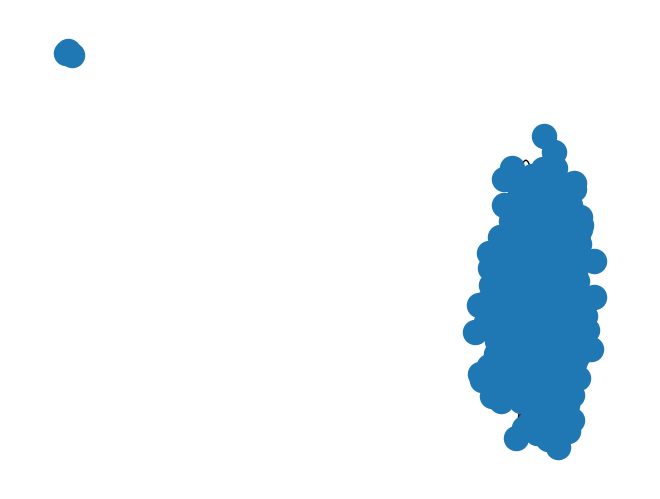

In [6]:
wikispeed = nx.draw_spring(graph)
plt.show()

In [7]:
random_nodes = random.sample(list(graph.nodes()), 2)
random_nodes

['Ukraine', 'Algorithm']

In [8]:
shortest_paths = nx.all_shortest_paths(graph, random_nodes[0], random_nodes[1])

In [9]:
for path in shortest_paths:
    print(path)

print("--- %s seconds ---" % (time.time() - start_time))

['Ukraine', 'Chess', 'Algorithm']
['Ukraine', 'History_of_computing_hardware', 'Algorithm']
['Ukraine', 'English_language', 'Algorithm']
--- 155.88080716133118 seconds ---


I don't know what this is, but it has to be important 

In [10]:
nx.wiener_index(graph)

inf